### Homework 4: SVM Classifier with different kernels ###

#### Dataset: using the one of most popular classification dataset which is Iris dataset. Iris dataset is having 4 features of iris flower and one target class. The flower species type is the target class which has 3 types.
#### The idea of implementing SVM classifier in Python is to use the iris features to train an svm classifier and use the trained svm model to predict the Iris species type. 

#### 1. (12 points) Importing Iris dataset from Scikit-Learn and understand Iris dataset ####

#### Required Packages 

In [31]:
from sklearn import svm
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Import iris data to model Svm classifier (3 points)

In [32]:
iris = datasets.load_iris()

#### Using the DESCR key over the iris_dataset to describ the dataset (3 points)

In [33]:
print("Description of Iris Dataset  :", iris['DESCR'])

Description of Iris Dataset  : .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ====

#### To get the iris features and the target classes (3 points)

In [34]:
print("Iris features :", iris.feature_names)
print("Target Classes :", iris.target_names)
print("Iris feature data :", iris['data'])

Iris features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes : ['setosa' 'versicolor' 'virginica']
Iris feature data : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1

#### To check the target data (3 points)

In [35]:
X = iris.data
y = iris.target

In [36]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 2. (16 points) Visualizing the Iris dataset
#### Notice: you can pickup any color or colormap for plotting


#### 2.1 (8 points) Visualizing the relationship between sepal and target classes

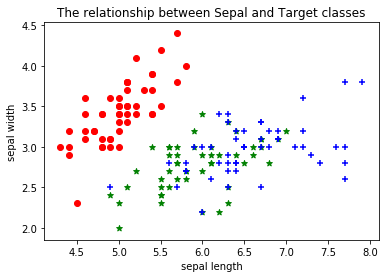

In [37]:
X = iris.data[:,:2]
y = iris.target
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color = 'g',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color = 'b',marker='+')
plt.title('The relationship between Sepal and Target classes')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

#### 2.2 (8 points) Visualizing the relationship between Petal and target classes

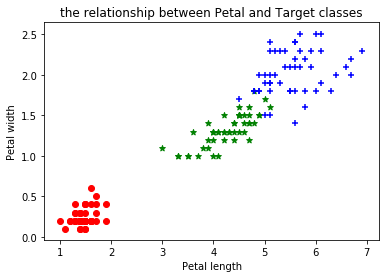

In [38]:
X = iris.data[:,2:]
y = iris.target
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color = 'g',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color = 'b',marker='+')
plt.title('the relationship between Petal and Target classes')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

#### 3. (15 points) Modeling Different Kernel SVM classifier using Iris Sepal features: with kernels of linear, RBF, and polynomial with degree=3

In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target, test_size=0.3, random_state=0)
lin_svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf').fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)

C:\Users\Siddhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 4. (15 points) Visualizing the modeled svm classifiers with Iris Sepal features. Notice: there are 3 plots to describ Iris Sepal features with svm classifiers about SVC with linear kernel, SVC with RBF kernel, SVC with polynomial (degree=3) kernel

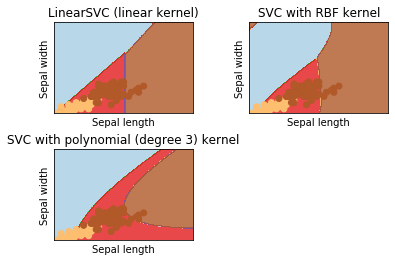

In [40]:
# the step of the grid
h = .02 
# to create the grid , so that we can plot the images on it
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# the title of the graph
titles = ['LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((lin_svc, rbf_svc, poly_svc)):
    # to plot the edge of different classes
    # to create a 2*2 grid , and set the i image as current image
    plt.subplot(2, 2, i + 1) 
    # set the margin between different sub-plot
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    # SVM input :xx and yy output: an array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    # to plot the result
    Z = Z.reshape(xx.shape) #(220, 280)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### 5. (6 points) Accuracy of predicting Iris Sepal features by the 3 kernels of linear, RBF and polynomial with degree=3 

In [41]:
lin_svc_pre = lin_svc.predict(X_test)
acc_lin_svc = sum(lin_svc_pre==y_test)/len(y_test)
rbf_svc_pre = rbf_svc.predict(X_test)
acc_rbf_svc = sum(rbf_svc_pre==y_test)/len(y_test)
poly_svc_pre = poly_svc.predict(X_test)
acc_poly_svc = sum(poly_svc_pre==y_test)/len(y_test)
print(acc_lin_svc)
print(acc_rbf_svc)
print(acc_poly_svc)

0.8
0.8
0.7777777777777778


#### 6. (15 points) Modeling Different Kernel SVM classifier using Iris Petal features: with kernels of linear, RBF and polynomial with degree=3 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,2:], iris.target, test_size=0.3, random_state=0)
svc = svm.SVC(kernel='linear').fit(X_train, y_train)
lin_svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf').fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
print(X_train)

[[3.5 1. ]
 [5.5 1.8]
 [5.7 2.5]
 [5.  1.5]
 [5.8 1.8]
 [3.9 1.1]
 [6.1 2.3]
 [4.7 1.6]
 [3.8 1.1]
 [4.9 1.8]
 [5.1 1.5]
 [4.5 1.7]
 [5.  1.9]
 [4.7 1.4]
 [5.2 2. ]
 [4.5 1.6]
 [1.6 0.2]
 [5.1 1.9]
 [4.2 1.3]
 [3.6 1.3]
 [4.  1.3]
 [4.6 1.4]
 [6.  1.8]
 [1.5 0.2]
 [1.1 0.1]
 [5.3 1.9]
 [4.2 1.2]
 [1.7 0.2]
 [1.5 0.4]
 [4.9 1.5]
 [1.5 0.2]
 [5.1 1.8]
 [3.  1.1]
 [1.4 0.3]
 [4.5 1.5]
 [6.1 2.5]
 [4.2 1.3]
 [1.4 0.1]
 [5.9 2.1]
 [5.7 2.3]
 [5.8 2.2]
 [5.6 2.1]
 [1.6 0.2]
 [1.6 0.2]
 [5.1 2. ]
 [5.7 2.1]
 [1.3 0.3]
 [5.4 2.3]
 [1.4 0.2]
 [5.  2. ]
 [5.4 2.1]
 [1.3 0.2]
 [1.4 0.2]
 [5.8 1.6]
 [1.4 0.3]
 [1.3 0.2]
 [1.7 0.4]
 [4.  1.3]
 [5.9 2.3]
 [6.6 2.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.5 1.3]
 [4.4 1.4]
 [1.2 0.2]
 [1.7 0.5]
 [4.3 1.3]
 [1.5 0.4]
 [6.9 2.3]
 [3.3 1. ]
 [6.4 2. ]
 [4.4 1.4]
 [1.5 0.1]
 [4.8 1.8]
 [1.2 0.2]
 [6.7 2. ]
 [1.5 0.3]
 [1.6 0.2]
 [6.1 1.9]
 [1.4 0.2]
 [5.6 2.4]
 [4.1 1.3]
 [3.9 1.2]
 [3.5 1. ]
 [5.3 2.3]
 [5.2 2.3]
 [4.9 1.5]
 [5.  1.7]
 [1.6 0.2]
 [3.7 1. ]

C:\Users\Siddhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 7. (15 points) Visualizing the modeled svm classifiers with Iris Petal features. Notice: there are 3 plots to describ Iris Pepal features with svm classifiers about SVC with linear kernel, SVC with RBF kernel, SVC with polynomial (degree=3) kernel.

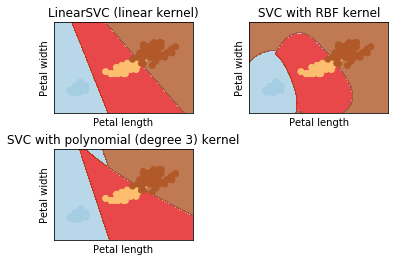

In [43]:
# the step of the grid
h = .02 
# to create the grid , so that we can plot the images on it
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# the title of the graph
titles = ['LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate(( lin_svc, rbf_svc, poly_svc)):
    # to plot the edge of different classes
    # to create a 2*2 grid , and set the i image as current image
    plt.subplot(2, 2, i + 1) 
    # set the margin between different sub-plot
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    # SVM input :xx and yy output: an array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    # to plot the result
    Z = Z.reshape(xx.shape) #(220, 280)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### 8. (6 points) Accuracy of predicting Iris Petal features by the 3 kernels of linear, RBF and polynomial with degree=3

In [44]:
lin_svc_pre = lin_svc.predict(X_test)
acc_lin_svc = sum(lin_svc_pre==y_test)/len(y_test)
rbf_svc_pre = rbf_svc.predict(X_test)
acc_rbf_svc = sum(rbf_svc_pre==y_test)/len(y_test)
poly_svc_pre = poly_svc.predict(X_test)
acc_poly_svc = sum(poly_svc_pre==y_test)/len(y_test)
print(acc_lin_svc)
print(acc_rbf_svc)
print(acc_poly_svc)

0.9777777777777777
0.9777777777777777
0.9777777777777777
